In [1]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv("C:/Users/Pooja/Desktop/bank-full.csv")

In [3]:
df

,"age;""job"";""marital"";""education"";""default"";""balance"";""housing"";""loan"";""contact"";""day"";""month"";""duration"";""campaign"";""pdays"";""previous"";""poutcome"";""y"""
0,"58;""management"";""married"";""tertiary"";""no"";2143..."
1,"44;""technician"";""single"";""secondary"";""no"";29;""..."
2,"33;""entrepreneur"";""married"";""secondary"";""no"";2..."
3,"47;""blue-collar"";""married"";""unknown"";""no"";1506..."
4,"33;""unknown"";""single"";""unknown"";""no"";1;""no"";""n..."
...,...
45206,"51;""technician"";""married"";""tertiary"";""no"";825;..."
45207,"71;""retired"";""divorced"";""primary"";""no"";1729;""n..."
45208,"72;""retired"";""married"";""secondary"";""no"";5715;""..."
45209,"57;""blue-collar"";""married"";""secondary"";""no"";66..."


In [5]:
df = df.rename(columns = {'age;"job";"marital";"education";"default";"balance";"housing";"loan";"contact";"day";"month";"duration";"campaign";"pdays";"previous";"poutcome";"y"': 'cols'})

In [6]:
df

,cols
0,"58;""management"";""married"";""tertiary"";""no"";2143..."
1,"44;""technician"";""single"";""secondary"";""no"";29;""..."
2,"33;""entrepreneur"";""married"";""secondary"";""no"";2..."
3,"47;""blue-collar"";""married"";""unknown"";""no"";1506..."
4,"33;""unknown"";""single"";""unknown"";""no"";1;""no"";""n..."
...,...
45206,"51;""technician"";""married"";""tertiary"";""no"";825;..."
45207,"71;""retired"";""divorced"";""primary"";""no"";1729;""n..."
45208,"72;""retired"";""married"";""secondary"";""no"";5715;""..."
45209,"57;""blue-collar"";""married"";""secondary"";""no"";66..."


In [7]:
data = pd.DataFrame()
data[["age","job","marital","education","default","balance","housing","loan","contact","day","month","duration","campaign","pdays","previous","poutcome","y"]] = df['cols'].str.split(';' , expand = True) 

In [8]:
data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,"""management""","""married""","""tertiary""","""no""",2143,"""yes""","""no""","""unknown""",5,"""may""",261,1,-1,0,"""unknown""","""no"""
1,44,"""technician""","""single""","""secondary""","""no""",29,"""yes""","""no""","""unknown""",5,"""may""",151,1,-1,0,"""unknown""","""no"""
2,33,"""entrepreneur""","""married""","""secondary""","""no""",2,"""yes""","""yes""","""unknown""",5,"""may""",76,1,-1,0,"""unknown""","""no"""
3,47,"""blue-collar""","""married""","""unknown""","""no""",1506,"""yes""","""no""","""unknown""",5,"""may""",92,1,-1,0,"""unknown""","""no"""
4,33,"""unknown""","""single""","""unknown""","""no""",1,"""no""","""no""","""unknown""",5,"""may""",198,1,-1,0,"""unknown""","""no"""
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,"""technician""","""married""","""tertiary""","""no""",825,"""no""","""no""","""cellular""",17,"""nov""",977,3,-1,0,"""unknown""","""yes"""
45207,71,"""retired""","""divorced""","""primary""","""no""",1729,"""no""","""no""","""cellular""",17,"""nov""",456,2,-1,0,"""unknown""","""yes"""
45208,72,"""retired""","""married""","""secondary""","""no""",5715,"""no""","""no""","""cellular""",17,"""nov""",1127,5,184,3,"""success""","""yes"""
45209,57,"""blue-collar""","""married""","""secondary""","""no""",668,"""no""","""no""","""telephone""",17,"""nov""",508,4,-1,0,"""unknown""","""no"""


In [ ]:
Converting object data types into category & numeric accordingly

In [10]:
data['job'] = data['job'].astype('category')
data['marital'] = data['marital'].astype('category')
data['education'] = data['education'].astype('category')
data['default']=data['default'].astype('category')
data['housing'] = data['housing'].astype('category')
data['loan'] = data['loan'].astype('category')
data['contact'] = data['contact'].astype('category')
data['month'] = data['month'].astype('category')
data['poutcome'] = data['poutcome'].astype('category')
data['y'] = data['y'].astype('category')

In [11]:
data['y'] = data['y'].replace('"no"' , '0')
data['y'] = data['y'].replace('"yes"' , '1')

In [12]:
data['age'] = data['age'].astype('int64')

In [13]:
data['balance'] = data['balance'].astype('int64')

In [14]:
data['day'] = data['day'].astype('int64')

In [15]:
data['duration'] = data['duration'].astype('int64')

In [16]:
data['campaign'] = data['campaign'].astype('int64')

In [17]:
data['pdays'] = data['pdays'].replace('-1' , '0')

In [18]:
data['pdays'] = data['pdays'].astype('int64')

In [19]:
data['previous'] = data['previous'].astype('int64')

In [20]:
data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,"""management""","""married""","""tertiary""","""no""",2143,"""yes""","""no""","""unknown""",5,"""may""",261,1,0,0,"""unknown""",0
1,44,"""technician""","""single""","""secondary""","""no""",29,"""yes""","""no""","""unknown""",5,"""may""",151,1,0,0,"""unknown""",0
2,33,"""entrepreneur""","""married""","""secondary""","""no""",2,"""yes""","""yes""","""unknown""",5,"""may""",76,1,0,0,"""unknown""",0
3,47,"""blue-collar""","""married""","""unknown""","""no""",1506,"""yes""","""no""","""unknown""",5,"""may""",92,1,0,0,"""unknown""",0
4,33,"""unknown""","""single""","""unknown""","""no""",1,"""no""","""no""","""unknown""",5,"""may""",198,1,0,0,"""unknown""",0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,"""technician""","""married""","""tertiary""","""no""",825,"""no""","""no""","""cellular""",17,"""nov""",977,3,0,0,"""unknown""",1
45207,71,"""retired""","""divorced""","""primary""","""no""",1729,"""no""","""no""","""cellular""",17,"""nov""",456,2,0,0,"""unknown""",1
45208,72,"""retired""","""married""","""secondary""","""no""",5715,"""no""","""no""","""cellular""",17,"""nov""",1127,5,184,3,"""success""",1
45209,57,"""blue-collar""","""married""","""secondary""","""no""",668,"""no""","""no""","""telephone""",17,"""nov""",508,4,0,0,"""unknown""",0


In [21]:
data.duplicated().value_counts()

False    45211
dtype: int64

In [22]:
data.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

C:\Users\Pooja\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='y', ylabel='count'>

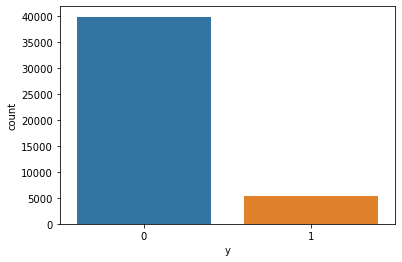

In [23]:
sns.countplot(data["y"])

In [24]:
data["y"].value_counts()

0    39922
1     5289
Name: y, dtype: int64

In [25]:
cat_cols  = data.select_dtypes(include=['category'])
cat_cols

,job,marital,education,default,housing,loan,contact,month,poutcome,y
0,"""management""","""married""","""tertiary""","""no""","""yes""","""no""","""unknown""","""may""","""unknown""",0
1,"""technician""","""single""","""secondary""","""no""","""yes""","""no""","""unknown""","""may""","""unknown""",0
2,"""entrepreneur""","""married""","""secondary""","""no""","""yes""","""yes""","""unknown""","""may""","""unknown""",0
3,"""blue-collar""","""married""","""unknown""","""no""","""yes""","""no""","""unknown""","""may""","""unknown""",0
4,"""unknown""","""single""","""unknown""","""no""","""no""","""no""","""unknown""","""may""","""unknown""",0
...,...,...,...,...,...,...,...,...,...,...
45206,"""technician""","""married""","""tertiary""","""no""","""no""","""no""","""cellular""","""nov""","""unknown""",1
45207,"""retired""","""divorced""","""primary""","""no""","""no""","""no""","""cellular""","""nov""","""unknown""",1
45208,"""retired""","""married""","""secondary""","""no""","""no""","""no""","""cellular""","""nov""","""success""",1
45209,"""blue-collar""","""married""","""secondary""","""no""","""no""","""no""","""telephone""","""nov""","""unknown""",0


In [27]:
cat_cols.drop("y", axis = 1, inplace =  True)

C:\Users\Pooja\anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [28]:
cat_cols

,job,marital,education,default,housing,loan,contact,month,poutcome
0,"""management""","""married""","""tertiary""","""no""","""yes""","""no""","""unknown""","""may""","""unknown"""
1,"""technician""","""single""","""secondary""","""no""","""yes""","""no""","""unknown""","""may""","""unknown"""
2,"""entrepreneur""","""married""","""secondary""","""no""","""yes""","""yes""","""unknown""","""may""","""unknown"""
3,"""blue-collar""","""married""","""unknown""","""no""","""yes""","""no""","""unknown""","""may""","""unknown"""
4,"""unknown""","""single""","""unknown""","""no""","""no""","""no""","""unknown""","""may""","""unknown"""
...,...,...,...,...,...,...,...,...,...
45206,"""technician""","""married""","""tertiary""","""no""","""no""","""no""","""cellular""","""nov""","""unknown"""
45207,"""retired""","""divorced""","""primary""","""no""","""no""","""no""","""cellular""","""nov""","""unknown"""
45208,"""retired""","""married""","""secondary""","""no""","""no""","""no""","""cellular""","""nov""","""success"""
45209,"""blue-collar""","""married""","""secondary""","""no""","""no""","""no""","""telephone""","""nov""","""unknown"""


In [ ]:
# scaling

In [29]:
from sklearn.preprocessing import LabelEncoder

In [30]:
le = LabelEncoder()

In [31]:
cat_cols = cat_cols.apply(le.fit_transform)
cat_cols

,job,marital,education,default,housing,loan,contact,month,poutcome
0,4,1,2,0,1,0,2,8,3
1,9,2,1,0,1,0,2,8,3
2,2,1,1,0,1,1,2,8,3
3,1,1,3,0,1,0,2,8,3
4,11,2,3,0,0,0,2,8,3
...,...,...,...,...,...,...,...,...,...
45206,9,1,2,0,0,0,0,9,3
45207,5,0,0,0,0,0,0,9,3
45208,5,1,1,0,0,0,0,9,2
45209,1,1,1,0,0,0,1,9,3


In [ ]:
# feature selection

In [32]:
from sklearn.feature_selection import chi2,SelectKBest

In [33]:
chisq = SelectKBest(score_func = chi2 , k = "all")

In [35]:
target = data['y']

In [36]:
chisq.fit(cat_cols,target)

SelectKBest(k='all', score_func=<function chi2 at 0x0000024E6457D670>)

In [37]:
feature_score = pd.DataFrame({"Score":chisq.scores_,"P_Value":chisq.pvalues_},index=cat_cols.columns) 
feature_score
    

,Score,P_Value
job,182.452260,1.412576e-41
marital,29.766067,4.874498e-08
education,90.617723,1.742922e-21
default,22.313875,2.315277e-06
housing,388.949715,1.401285e-86
loan,176.516137,2.793375e-40
contact,1253.814109,1.230845e-274
month,44.321905,2.785815e-11
poutcome,104.677479,1.437254e-24


In [38]:
feature_score.sort_values('Score',ascending = False)

,Score,P_Value
contact,1253.814109,1.230845e-274
housing,388.949715,1.401285e-86
job,182.452260,1.412576e-41
loan,176.516137,2.793375e-40
poutcome,104.677479,1.437254e-24
education,90.617723,1.742922e-21
month,44.321905,2.785815e-11
marital,29.766067,4.874498e-08
default,22.313875,2.315277e-06


In [39]:
num_cols  = data.select_dtypes(include=['int64'])
num_cols

,age,balance,day,duration,campaign,pdays,previous
0,58,2143,5,261,1,0,0
1,44,29,5,151,1,0,0
2,33,2,5,76,1,0,0
3,47,1506,5,92,1,0,0
4,33,1,5,198,1,0,0
...,...,...,...,...,...,...,...
45206,51,825,17,977,3,0,0
45207,71,1729,17,456,2,0,0
45208,72,5715,17,1127,5,184,3
45209,57,668,17,508,4,0,0


In [40]:
from sklearn.feature_selection import f_classif

In [41]:
f_test = SelectKBest(score_func= f_classif,k='all')

In [42]:
f_test.fit(num_cols , target)

SelectKBest(k='all')

In [43]:
feature_score1 = pd.DataFrame({"Score":f_test.scores_,"P_Value":f_test.pvalues_},index= num_cols.columns)
feature_score1

,Score,P_Value
age,28.625233,8.825644e-08
balance,126.572276,2.521114e-29
day,36.359010,1.653880e-09
duration,8333.761148,0.000000e+00
campaign,243.358404,1.012347e-54
pdays,487.842429,1.559848e-107
previous,396.443989,7.801830e-88


In [44]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   age        45211 non-null  int64   
 1   job        45211 non-null  category
 2   marital    45211 non-null  category
 3   education  45211 non-null  category
 4   default    45211 non-null  category
 5   balance    45211 non-null  int64   
 6   housing    45211 non-null  category
 7   loan       45211 non-null  category
 8   contact    45211 non-null  category
 9   day        45211 non-null  int64   
 10  month      45211 non-null  category
 11  duration   45211 non-null  int64   
 12  campaign   45211 non-null  int64   
 13  pdays      45211 non-null  int64   
 14  previous   45211 non-null  int64   
 15  poutcome   45211 non-null  category
 16  y          45211 non-null  category
dtypes: category(10), int64(7)
memory usage: 2.8 MB


In [ ]:
 # dropping columns with low scores

In [45]:
cat_cols.drop(columns = ['education','marital','default','month'] , axis=1,inplace = True)
cat_cols

,job,housing,loan,contact,poutcome
0,4,1,0,2,3
1,9,1,0,2,3
2,2,1,1,2,3
3,1,1,0,2,3
4,11,0,0,2,3
...,...,...,...,...,...
45206,9,0,0,0,3
45207,5,0,0,0,3
45208,5,0,0,0,2
45209,1,0,0,1,3


In [46]:
num_cols.drop(columns = ['day','age'] , axis=1,inplace = True)
num_cols

C:\Users\Pooja\anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,balance,duration,campaign,pdays,previous
0,2143,261,1,0,0
1,29,151,1,0,0
2,2,76,1,0,0
3,1506,92,1,0,0
4,1,198,1,0,0
...,...,...,...,...,...
45206,825,977,3,0,0
45207,1729,456,2,0,0
45208,5715,1127,5,184,3
45209,668,508,4,0,0


In [47]:
final_data = pd.concat([num_cols, cat_cols,target], axis=1)
final_data

,balance,duration,campaign,pdays,previous,job,housing,loan,contact,poutcome,y
0,2143,261,1,0,0,4,1,0,2,3,0
1,29,151,1,0,0,9,1,0,2,3,0
2,2,76,1,0,0,2,1,1,2,3,0
3,1506,92,1,0,0,1,1,0,2,3,0
4,1,198,1,0,0,11,0,0,2,3,0
...,...,...,...,...,...,...,...,...,...,...,...
45206,825,977,3,0,0,9,0,0,0,3,1
45207,1729,456,2,0,0,5,0,0,0,3,1
45208,5715,1127,5,184,3,5,0,0,0,2,1
45209,668,508,4,0,0,1,0,0,1,3,0


In [48]:
final_data['y']=pd.to_numeric(final_data['y'],errors='coerce')
final_data

,balance,duration,campaign,pdays,previous,job,housing,loan,contact,poutcome,y
0,2143,261,1,0,0,4,1,0,2,3,0
1,29,151,1,0,0,9,1,0,2,3,0
2,2,76,1,0,0,2,1,1,2,3,0
3,1506,92,1,0,0,1,1,0,2,3,0
4,1,198,1,0,0,11,0,0,2,3,0
...,...,...,...,...,...,...,...,...,...,...,...
45206,825,977,3,0,0,9,0,0,0,3,1
45207,1729,456,2,0,0,5,0,0,0,3,1
45208,5715,1127,5,184,3,5,0,0,0,2,1
45209,668,508,4,0,0,1,0,0,1,3,0


In [ ]:
# Checking correclation between variables

In [49]:
final_data.corr()

,balance,duration,campaign,pdays,previous,job,housing,loan,contact,poutcome,y
balance,1.000000,0.021560,-0.014578,0.003330,0.016674,0.018232,-0.068768,-0.084350,-0.027273,-0.020967,0.052838
duration,0.021560,1.000000,-0.084570,-0.001584,0.001203,0.004744,0.005075,-0.012412,-0.020839,0.010925,0.394521
campaign,-0.014578,-0.084570,1.000000,-0.088508,-0.032855,0.006839,-0.023599,0.009980,0.019614,0.101588,-0.073172
pdays,0.003330,-0.001584,-0.088508,1.000000,0.454288,-0.024531,0.124350,-0.022709,-0.244526,-0.857609,0.103323
previous,0.016674,0.001203,-0.032855,0.454288,1.000000,-0.000911,0.037076,-0.011043,-0.147811,-0.489752,0.093236
job,0.018232,0.004744,0.006839,-0.024531,-0.000911,1.000000,-0.125363,-0.033004,-0.082063,0.011010,0.040438
housing,-0.068768,0.005075,-0.023599,0.124350,0.037076,-0.125363,1.000000,0.041323,0.188123,-0.099971,-0.139173
loan,-0.084350,-0.012412,0.009980,-0.022709,-0.011043,-0.033004,0.041323,1.000000,-0.010873,0.015458,-0.068185
contact,-0.027273,-0.020839,0.019614,-0.244526,-0.147811,-0.082063,0.188123,-0.010873,1.000000,0.272214,-0.148395
poutcome,-0.020967,0.010925,0.101588,-0.857609,-0.489752,0.011010,-0.099971,0.015458,0.272214,1.000000,-0.077840


<AxesSubplot:>

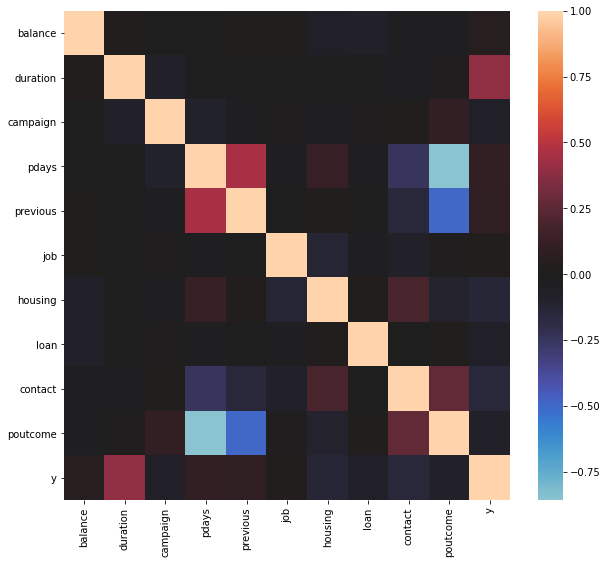

In [50]:
fig = plt.subplots(figsize = (10,9))
sns.heatmap(final_data.corr(),center=0)

In [ ]:
# pdays and p outcome has very high correlation , multicollinearity problem could occur
dropping p outcome column as it has a lesser score

In [51]:
final_data = final_data.drop('poutcome' , axis =1)
final_data

,balance,duration,campaign,pdays,previous,job,housing,loan,contact,y
0,2143,261,1,0,0,4,1,0,2,0
1,29,151,1,0,0,9,1,0,2,0
2,2,76,1,0,0,2,1,1,2,0
3,1506,92,1,0,0,1,1,0,2,0
4,1,198,1,0,0,11,0,0,2,0
...,...,...,...,...,...,...,...,...,...,...
45206,825,977,3,0,0,9,0,0,0,1
45207,1729,456,2,0,0,5,0,0,0,1
45208,5715,1127,5,184,3,5,0,0,0,1
45209,668,508,4,0,0,1,0,0,1,0


In [ ]:
# data visualization

<AxesSubplot:xlabel='age', ylabel='y'>

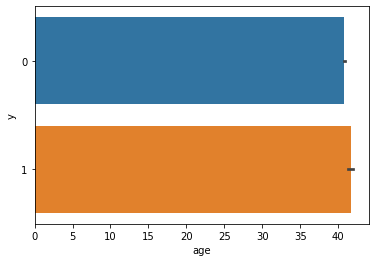

In [52]:
sns.barplot(x='age' , y='y' , data=data)

<AxesSubplot:xlabel='balance', ylabel='y'>

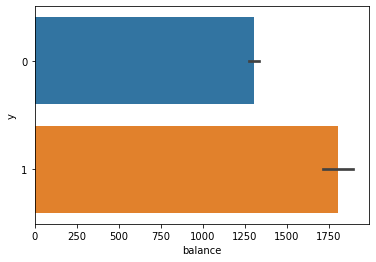

In [53]:
sns.barplot(x='balance' , y='y' , data=data)

<AxesSubplot:xlabel='y', ylabel='day'>

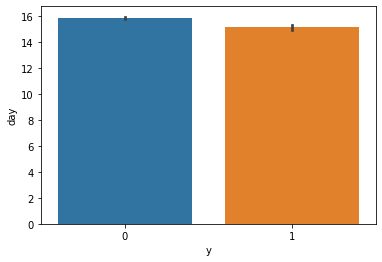

In [54]:
sns.barplot(x='y' , y='day' , data=data)

<AxesSubplot:xlabel='duration', ylabel='y'>

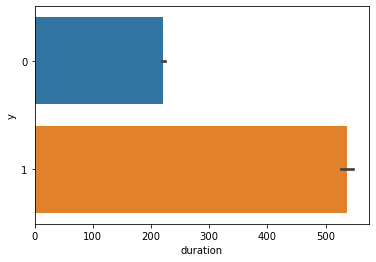

In [55]:
sns.barplot(x='duration' , y='y' , data=data)

<AxesSubplot:xlabel='campaign', ylabel='y'>

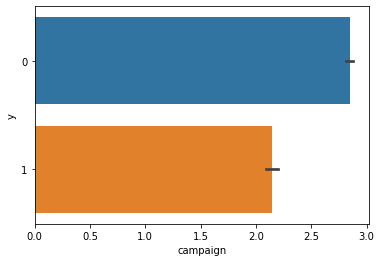

In [56]:
sns.barplot(x='campaign' , y='y' , data=data)

<AxesSubplot:xlabel='pdays', ylabel='y'>

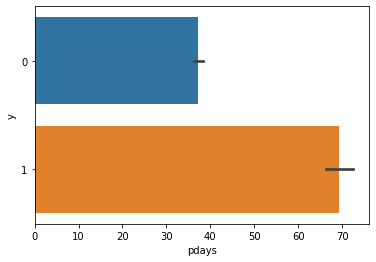

In [57]:
sns.barplot(x='pdays' , y='y' , data=data)

<AxesSubplot:xlabel='y', ylabel='previous'>

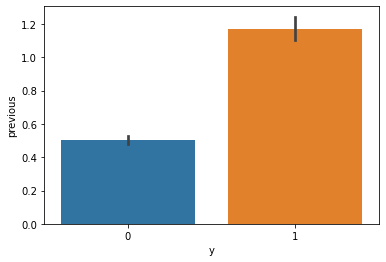

In [58]:
sns.barplot(x='y' , y='previous' , data=data)

<AxesSubplot:xlabel='y', ylabel='count'>

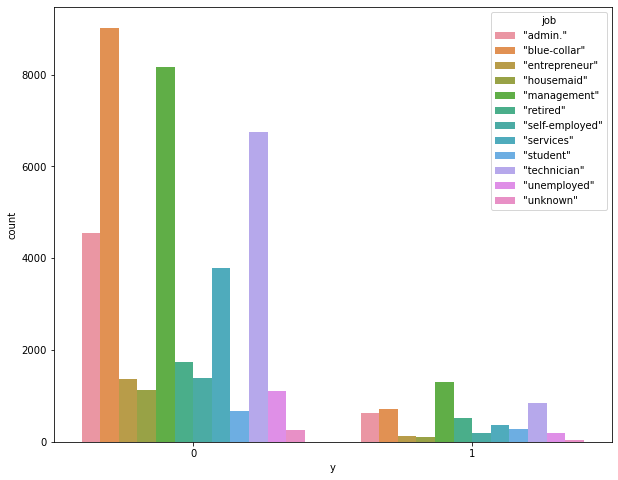

In [59]:
fig = plt.subplots(figsize=(10,8))
sns.countplot(x = 'y', data=data , hue='job')

<AxesSubplot:xlabel='y', ylabel='count'>

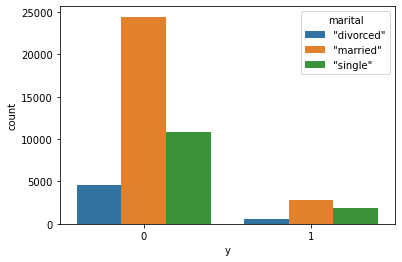

In [60]:
sns.countplot(x = 'y', data=data , hue='marital')

<AxesSubplot:xlabel='y', ylabel='count'>

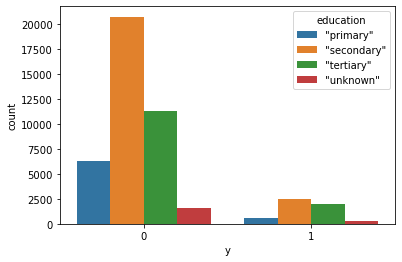

In [61]:
sns.countplot(x = 'y', data=data , hue='education')

<AxesSubplot:xlabel='y', ylabel='count'>

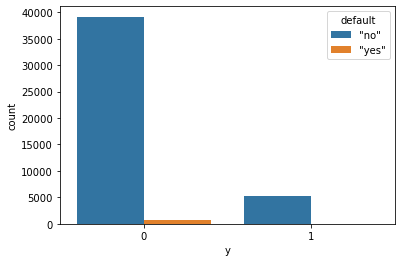

In [62]:
sns.countplot(x = 'y', data=data , hue='default')

<AxesSubplot:xlabel='y', ylabel='count'>

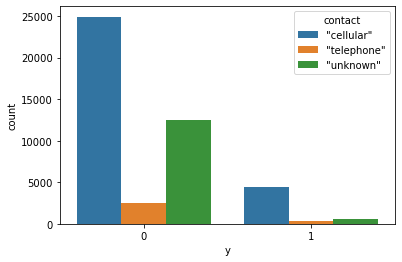

In [63]:
sns.countplot(x = 'y', data=data , hue='contact')

<AxesSubplot:xlabel='y', ylabel='count'>

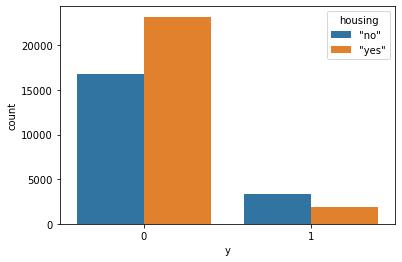

In [64]:
sns.countplot(x = 'y', data=data , hue='housing')

<AxesSubplot:xlabel='y', ylabel='count'>

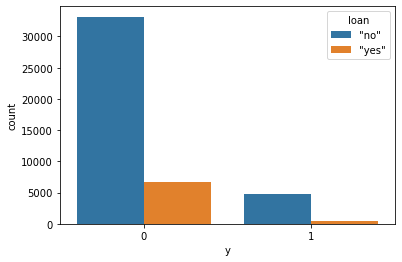

In [65]:
sns.countplot(x = 'y', data=data , hue='loan')

<AxesSubplot:xlabel='y', ylabel='count'>

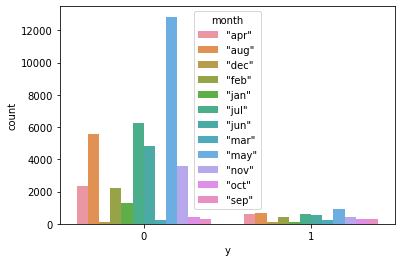

In [68]:
sns.countplot(x = 'y', data=data , hue='month')

<AxesSubplot:xlabel='y', ylabel='count'>

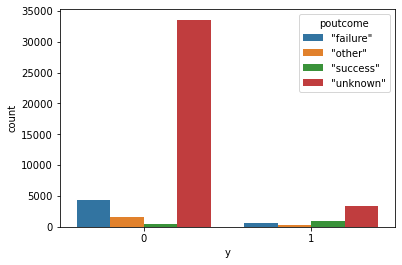

In [69]:
sns.countplot(x = 'y', data=data , hue='poutcome')

In [ ]:
# Separating dependant and independant variable

In [70]:
X = final_data.iloc[:,0:9]
X

,balance,duration,campaign,pdays,previous,job,housing,loan,contact
0,2143,261,1,0,0,4,1,0,2
1,29,151,1,0,0,9,1,0,2
2,2,76,1,0,0,2,1,1,2
3,1506,92,1,0,0,1,1,0,2
4,1,198,1,0,0,11,0,0,2
...,...,...,...,...,...,...,...,...,...
45206,825,977,3,0,0,9,0,0,0
45207,1729,456,2,0,0,5,0,0,0
45208,5715,1127,5,184,3,5,0,0,0
45209,668,508,4,0,0,1,0,0,1


In [71]:
Y = final_data['y']
Y

0        0
1        0
2        0
3        0
4        0
        ..
45206    1
45207    1
45208    1
45209    0
45210    0
Name: y, Length: 45211, dtype: int64

In [ ]:
# splitting the data into train and test

In [72]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,train_size = 0.80,random_state = 42)

In [ ]:
# Building logistic regression model

In [74]:
LR = LogisticRegression(max_iter=100)

In [75]:
LR.fit(x_train, y_train)

C:\Users\Pooja\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [77]:
y_pred = LR.predict(x_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [78]:
vals = pd.DataFrame({'Actual value': y_test, 'Predicted value':y_pred})

In [79]:
vals

,Actual value,Predicted value
3776,0,0
9928,0,0
33409,0,0
31885,0,0
15738,0,0
...,...,...
13353,0,0
38732,1,0
5654,0,0
3779,0,0


In [80]:
from sklearn import metrics 
from sklearn.metrics import classification_report, confusion_matrix

In [81]:
# Accuracy score
metrics.accuracy_score(y_test, y_pred)

0.883777507464337

In [82]:
# Confusion matrix
matrix = confusion_matrix(y_test, y_pred)
matrix

array([[7770,  182],
       [ 869,  222]], dtype=int64)

Text(51.0, 0.5, 'True')

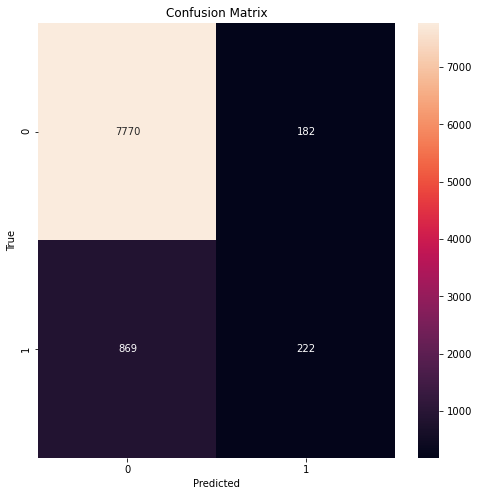

In [83]:
plt.subplots(figsize = (8,8))
sns.heatmap(matrix, annot=True,fmt="d")
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')

In [84]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94      7952
           1       0.55      0.20      0.30      1091

    accuracy                           0.88      9043
   macro avg       0.72      0.59      0.62      9043
weighted avg       0.86      0.88      0.86      9043



In [85]:
#predict probabilities
pred_prob = LR.predict_proba(x_test)
pred_prob

array([[0.9897491 , 0.0102509 ],
       [0.98938676, 0.01061324],
       [0.92819949, 0.07180051],
       ...,
       [0.98842341, 0.01157659],
       [0.99512966, 0.00487034],
       [0.98779592, 0.01220408]])

In [86]:
prob = pred_prob[:,1]
prob

array([0.0102509 , 0.01061324, 0.07180051, ..., 0.01157659, 0.00487034,
       0.01220408])

<function matplotlib.pyplot.show(close=None, block=None)>

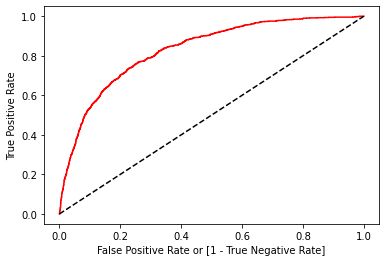

In [88]:
# ROC curve
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
fpr, tpr, thresh = roc_curve(y_test, prob)
plt.plot(fpr, tpr, color='red', label='logistic Regression')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')
plt.plot([0, 1], [0, 1], 'k--')
plt.show